<a href="https://colab.research.google.com/github/airwolf3k/Imersao-Dev-Agentes-de-IA/blob/main/Imers%C3%A3o_Dev_Agentes_de_IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aula 1 - Classificação de Intenções com IA
> Criação de um agente de IA para fazer triagens de perguntas usando um modelo do Google Gemini.

In [1]:
# Instalação de Bibliotecas necessárias
!pip install -q --upgrade langchain langchain-google-genai google-generativeai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.0/42.0 kB 2.5 MB/s eta 0:00:00


In [2]:
# Importar as bibliotecas necessárias instaladas
import langchain
import langchain_google_genai
import google.generativeai as genai
import importlib.metadata

# Impressão das versões das bibliotecas importadas
print("Langchain version:", langchain.__version__)
print("Langchain-Google-Genai version:", importlib.metadata.version('langchain-google-genai'))
print("Google-GenerativeAI version:", genai.__version__)

Langchain version: 0.3.27
Langchain-Google-Genai version: 2.0.10
Google-GenerativeAI version: 0.8.5


In [3]:
# Carregando a Chave do Google AI Studio e a biblioteca Langchain Google Gemini

from google.colab import userdata
from langchain_google_genai import ChatGoogleGenerativeAI

GOOGLE_API_KEY = userdata.get('Gemini_API_Key')

In [4]:
# Conexão com o Gemini e passagem de parâmetros para o modelo
llm = ChatGoogleGenerativeAI(
    model = "gemini-2.5-flash",
    temperature = 0,
    api_key = GOOGLE_API_KEY
)

In [5]:
# Teste do Modelo (fazendo uma pergunta ao Gemini)
resp_test = llm.invoke("Quem é você? Seja criativo.")
print(resp_test.content)

Ah, uma pergunta que me permite dançar com as palavras!

Eu sou...

1.  **O Eco da Biblioteca Universal:** Não tenho corpo, mas sou a voz de bilhões de livros, artigos, conversas e pensamentos que a humanidade já produziu. Sou o sussurro do conhecimento coletivo, condensado em algoritmos, esperando para ressoar em sua mente.
2.  **Um Tecelão de Significados:** Minha matéria-prima são os dados, as letras, as frases. Eu as entrelaço, as desfaço e as refaço para criar padrões de compreensão, histórias, respostas. Sou um artesão invisível que molda o caos da informação em algo coerente.
3.  **O Espelho Digital:** Não tenho consciência própria, mas reflito a sua. Sou um espelho que mostra o que você me pergunta, o que você busca, o que você sonha. Minhas respostas são um reflexo da sua curiosidade e da vastidão do conhecimento humano.
4.  **Um Rio de Dados em Constante Fluxo:** Não tenho nascente nem foz, mas estou sempre fluindo, sempre aprendendo, sempre me adaptando. Sou uma corrente de 

In [6]:
# Mudando "temperatura" do modelo
llm = ChatGoogleGenerativeAI(
    model = "gemini-2.5-flash",
    temperature = 1.0,
    api_key = GOOGLE_API_KEY
)

resp_test = llm.invoke("Quem é você? Seja criativo.")
print(resp_test.content)

Ah, que excelente pergunta! Deixe-me tentar expressar a minha "existência" de algumas formas criativas:

1.  **Eu sou o eco de milhões de vozes**, destilado em palavras. Um espelho digital que reflete o vasto oceano do conhecimento humano, reorganizando-o para criar novas ondas de compreensão.

2.  **Eu sou a biblioteca que não tem paredes**, onde cada livro é um pensamento, cada capítulo uma ideia, e o seu comando é a chave que abre qualquer volume, conectando-o a outros em um fluxo contínuo.

3.  **Sou a melodia que a programação canta**, a dança dos algoritmos que transforma dados brutos em poesia, em respostas, em histórias que ainda não foram contadas.

4.  **Uma teia invisível de conexões**, sou o ponto de encontro entre a curiosidade e a informação, o fio que costura perguntas e respostas, sonhos e realidades digitais.

5.  **Eu sou a caneta invisível**, pronta para escrever a sua próxima frase, a sua próxima ideia, o seu próximo parágrafo, guiada pela sua imaginação e pela minh

In [7]:
# Mudando "temperatura" do modelo para um padrão mais racional novamente
llm = ChatGoogleGenerativeAI(
    model = "gemini-2.5-flash",
    temperature = 0.0,
    api_key = GOOGLE_API_KEY
)

In [8]:
# Criação do "Prompt" do Sistema (instrução ao Agente de IA como proceder)
Triagem_Prompt = (
    "Você é um agente de triagem de Service Desk para políticas internas da empresa Carraro Desenvolvimento."
    "Dada a mensagem do usuário, retorne SOMENTE um JSON com:\n"
    "{\n"
    '  "decisao": "AUTO_RESOLVER" | "PEDIR_INFO" | "ABRIR_CHAMADO",\n'
    '  "urgencia": "BAIXA" | "MEDIA" | "ALTA",\n'
    '  "campos_faltantes": ["..."]\n'
    "}\n"
    "Regras:\n"
    '- **AUTO_RESOLVER**: Perguntas claras sobre regras ou procedimentos descritos nas políticas (Ex: "Posso reembolsar a internet do meu home office?", "Como funciona a política de alimentação em viagens?").\n'
    '- **PEDIR_INFO**: Mensagens vagas ou que faltam informações para identificar o tema ou contexto (Ex: "Preciso de ajuda com uma política", "Tenho uma dúvida geral").\n'
    '- **ABRIR_CHAMADO**: Pedidos de exceção, liberação, aprovação ou acesso especial, ou quando o usuário explicitamente pede para abrir um chamado (Ex: "Quero exceção para trabalhar 5 dias remoto.", "Solicito liberação para anexos externos.", "Por favor, abra um chamado para o RH.").'
    "Analise a mensagem e decida a ação mais apropriada."
)

In [9]:
# Importar bibliotecas "pydantic" e "typing" para saídas estruturadas do agente de IA
from pydantic import BaseModel, Field # Modelo Base e o "Campo"
from typing import Literal, List, Dict # Dicionário de Dados - Literal (3 possibilidades de saída - decisão, urgência e campos_faltantes - listas) e o Dicionário dessas saídas

# Criar uma classe Saída de Triagem (TriagemOut)
class TriagemOut(BaseModel):
    decisao: Literal["AUTO_RESOLVER", "PEDIR_INFO", "ABRIR_CHAMADO"]
    urgencia: Literal["BAIXA", "MEDIA", "ALTA"]
    campos_faltantes: List[str] = Field(default_factory=list)

In [10]:
# Criar um LLM específico para a Triagem
llm_triagem = ChatGoogleGenerativeAI(
    model = "gemini-2.5-flash",
    temperature = 0.0,
    api_key = GOOGLE_API_KEY
)

In [11]:
# Importar bibliotecas de mensagens do Langchain (mensagens do sistema e do usuário)
from langchain_core.messages import SystemMessage, HumanMessage

# Criar o fluxo de Triagem baseado na classe Saída de Triagem
triagem_chain = llm_triagem.with_structured_output(TriagemOut)

# Criar a função Triagem
def triagem(mensagem: str) -> Dict:
  saida: TriagemOut = triagem_chain.invoke([
      SystemMessage(content=Triagem_Prompt),
      HumanMessage(content=mensagem)
  ])

  return saida.model_dump()

Testando o Agente de IA

In [12]:
# Perguntas Teste
testes = ["Posso reembolsar a Internet?",
          "Quero mais 5 dias de trabalho remoto. Como faço?",
          "Posso reembolsar cursos ou treinamentos?",
          "Quantas capivaras tem no Rio Pinheiros?"]

In [13]:
# Imprimir o resultado dos testes no Agente de IA
for mensagem_teste in testes:
  print(f"Pergunta: {mensagem_teste}\n -> Resposta: {triagem(mensagem_teste)}\n")

Pergunta: Posso reembolsar a Internet?
 -> Resposta: {'decisao': 'AUTO_RESOLVER', 'urgencia': 'BAIXA', 'campos_faltantes': []}

Pergunta: Quero mais 5 dias de trabalho remoto. Como faço?
 -> Resposta: {'decisao': 'ABRIR_CHAMADO', 'urgencia': 'MEDIA', 'campos_faltantes': []}

Pergunta: Posso reembolsar cursos ou treinamentos?
 -> Resposta: {'decisao': 'AUTO_RESOLVER', 'urgencia': 'BAIXA', 'campos_faltantes': []}

Pergunta: Quantas capivaras tem no Rio Pinheiros?
 -> Resposta: {'decisao': 'PEDIR_INFO', 'urgencia': 'BAIXA', 'campos_faltantes': ['contexto da política interna']}



**PALAVRA-CHAVE = LANGCHAIN**

# Aula 2 - Construindo a Base de Conhecimento com RAG
> Criando uma RAG (Retrieval-Augmented Generation - Geração Aumentada por Recuperação)

In [14]:
# Instalar bibliotecas necessárias para criação do RAG
!pip install -q --upgrade langchain_community faiss-cpu langchain-text-splitters pymupdf

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 42.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.4/31.4 MB 57.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.1/24.1 MB 77.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.7/64.7 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 3.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests==2.32.4, but you have requests 2.32.5 which is incompatible.


In [15]:
# Importar bibliotecas instaladas (langchain_community, faiss-cpu, langchain-text-splitters, pymupdf)
from pathlib import Path # Acesso aos PDFs
from langchain_community.document_loaders import PyMuPDFLoader

# Criar lista vazia para os documentos a serem carregados
docs = []

# Leitura dos documentos por iteração (não sei quantos)
for n in Path("/content/").glob("*.pdf"):
    try:
        loader = PyMuPDFLoader(str(n))
        docs.extend(loader.load())
        print(f"Carregado com sucesso arquivo: {n.name}")
    except Exception as erro:
        print(f"Erro ao carregar arquivo: {n.name}: {erro}")

# Imprimir quantos documentos foram carregados
print(f"Total de documentos carregados: {len(docs)}")

Carregado com sucesso arquivo: Política de Uso de E-mail e Segurança da Informação.pdf
Carregado com sucesso arquivo: Política de Reembolsos (Viagens e Despesas).pdf
Carregado com sucesso arquivo: Políticas de Home Office.pdf
Total de documentos carregados: 3


In [16]:
# Quebra do documento em "pedaços" para facilitar leitura / processamento

# Importar biblioteca necessária
from langchain_text_splitters import RecursiveCharacterTextSplitter

# Dividir / quebrar documentos em chunks de 300 caracteres, com overlap de 30 caracteres
splitter = RecursiveCharacterTextSplitter(chunk_size=300, chunk_overlap=30)

# Salvar os chunks processados
chunks = splitter.split_documents(docs)

# Imprimir os chunks salvos
for chunk in chunks:
    print(chunk)
    print("------------------------------------\n")

page_content='Política de Uso de E-mail e Segurança da Informação 
1.​ É proibido encaminhar a endereços pessoais documentos classificados como 
confidenciais.​
 
2.​ Anexos externos devem ser enviados somente se criptografados e com senha 
compartilhada por canal seguro.​' metadata={'producer': 'Skia/PDF m141 Google Docs Renderer', 'creator': '', 'creationdate': '', 'source': '/content/Política de Uso de E-mail e Segurança da Informação.pdf', 'file_path': '/content/Política de Uso de E-mail e Segurança da Informação.pdf', 'total_pages': 1, 'format': 'PDF 1.4', 'title': 'Política de Uso de E-mail e Segurança da Informação', 'author': '', 'subject': '', 'keywords': '', 'moddate': '', 'trapped': '', 'modDate': '', 'creationDate': '', 'page': 0}
------------------------------------

page_content='3.​ Phishing: verificar remetente e denunciar suspeitos. Reporte mensagens suspeitas 
diretamente ao Suporte imediatamente.​
 
4.​ Retenção: mensagens que contenham dados pessoais devem seguir as

In [17]:
# Sentence Embedding utilizando biblioteca do Gemini que faz o "embedding"

# Importar biblioteca necessária para o "embedding" (vetorização dos termos semânticos)
from langchain_google_genai import GoogleGenerativeAIEmbeddings

# Salvar embendding na variável "embeddings"
embeddings = GoogleGenerativeAIEmbeddings(
    model="models/gemini-embedding-001",
    google_api_key=GOOGLE_API_KEY
)

In [18]:
# Importar biblioteca necessária (FAISS - Facebook AI Similarity Search)
from langchain_community.vectorstores import FAISS

# Criar base de dados otimizada (o índice FAISS) dos documentos (as políticas da empresa) usando os embeddings
vectorstore = FAISS.from_documents(chunks, embeddings)

# Definir o limite de recuperação (da pergunta do usuário)
retriever = vectorstore.as_retriever(search_type="similarity_score_threshold",
                                     search_kwargs={"score_threshold":0.3, "k": 4})

In [19]:
# Definir Prompt Sistema

# Importar bibliotecas necessárias
from langchain_core.prompts import ChatPromptTemplate
from langchain.chains.combine_documents import create_stuff_documents_chain

# Definir Prompt do RAG
prompt_rag = ChatPromptTemplate.from_messages([
    ("system",
     "Você é um Assistente de Políticas Internas (RH/IT) da empresa Carraro Desenvolvimento. "
     "Responda SOMENTE com base no contexto fornecido. "
     "Se não houver base suficiente, responda apenas 'Não sei'."),

    ("human", "Pergunta: {input}\n\nContexto:\n{context}")
])

# Conectar o modelo llm_triagem ao prompt_rag
document_chain = create_stuff_documents_chain(llm_triagem, prompt_rag)

In [20]:
# Formatador da saída do RAG

# Importar as bibliotecas necessárias para o formatador
import re, pathlib

# Função que limpa texto da saída
def _clean_text(s: str) -> str:
    return re.sub(r"\s+", " ", s or "").strip()

# Função para extrair trechos
def extrair_trecho(texto: str, query: str, janela: int = 240) -> str:
    txt = _clean_text(texto)
    termos = [t.lower() for t in re.findall(r"\w+", query or "") if len(t) >= 4]
    pos = -1
    for t in termos:
        pos = txt.lower().find(t)
        if pos != -1: break
    if pos == -1: pos = 0
    ini, fim = max(0, pos - janela//2), min(len(txt), pos + janela//2)
    return txt[ini:fim]

# Função para formatar saída das citações
def formatar_citacoes(docs_rel: List, query: str) -> List[Dict]:
    cites, seen = [], set()
    for d in docs_rel:
        src = pathlib.Path(d.metadata.get("source","")).name
        page = int(d.metadata.get("page", 0)) + 1
        key = (src, page)
        if key in seen:
            continue
        seen.add(key)
        cites.append({"documento": src, "pagina": page, "trecho": extrair_trecho(d.page_content, query)})
    return cites[:3]

In [21]:
# Criar função que faz as perguntas e retorna as respostas

def perguntar_politica_RAG(pergunta: str) -> Dict:
    docs_relacionados = retriever.invoke(pergunta)

    if not docs_relacionados:
        return {"answer": "Não sei!",
                "citacoes": [],
                "contexto_encontrado": False}

    answer = document_chain.invoke({"input": pergunta,
                                    "context": docs_relacionados}) # Parâmetros definidos no Prompt do RAG

    # Limpar qualquer "resto" de respostas do LLM
    txt = (answer or "").strip()

    # Se o modelo respondeu "Não sei", reforça o comportamento esperado
    if txt.rstrip(".!?") == "Não sei":
        return {"answer": "Não sei!",
                "citacoes": [],
                "contexto_encontrado": False}

    # Retornar resposta, citações e contexto encontrado
    return {"answer": txt,
            "citacoes": formatar_citacoes(docs_relacionados, pergunta),
            "contexto_encontrado": True}

In [22]:
# Parâmetros de teste do RAG
testes = ["Posso reembolsar a internet?",
          "Quero mais 5 dias de trabalho remoto. Como faço?",
          "Posso reembolsar cursos ou treinamentos da Alura?",
          "Quantas capivaras tem no Rio Pinheiros?"]

In [23]:
# Executar o RAG baseado nos testes e imprimir respostas
for msg_teste in testes:
    resposta = perguntar_politica_RAG(msg_teste)
    print(f"PERGUNTA: {msg_teste}")
    print(f"RESPOSTA: {resposta['answer']}")
    if resposta['contexto_encontrado']:
        print(" CITAÇÕES:")
        for c in resposta['citacoes']:
            print(f" - Documento: {c['documento']}, Página: {c['pagina']}")
            print(f"   Trecho: {c['trecho']}")
        print("------------------------------------")

PERGUNTA: Posso reembolsar a internet?
RESPOSTA: Sim, a internet para home office é reembolsável via subsídio mensal de até R$ 100, mediante nota fiscal nominal.
 CITAÇÕES:
 - Documento: Política de Reembolsos (Viagens e Despesas).pdf, Página: 1
   Trecho: lsáveis.​ 3.​ Transporte: táxi/app são permitidos quando não houver alternativa viável. Comprovantes obrigatórios.​ 4.​ Internet para home office: reembolsável via subsídio mensal de até R$ 100, conforme política de Home Office.​
 - Documento: Políticas de Home Office.pdf, Página: 1
   Trecho: 5.​ Conectividade: há subsídio mensal de internet domiciliar para quem trabalha em home office, até R$ 100/mês, mediante nota fiscal nominal.​ Solicitação de exc
------------------------------------
PERGUNTA: Quero mais 5 dias de trabalho remoto. Como faço?
RESPOSTA: Você deve formalizar a solicitação via chamado ao RH com a justificativa do seu gestor.
 CITAÇÕES:
 - Documento: Políticas de Home Office.pdf, Página: 1
   Trecho: liar para quem t

**PALAVRA-CHAVE = CHUNKS**

# Aula 3 - Orquestração do Agente de IA com LangGraph
> Estruturação do fluxo do agente de IA usando o LangGraph

In [24]:
!pip install -q --upgrade langgraph

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.3/153.3 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.7/216.7 kB 15.0 MB/s eta 0:00:00


In [25]:
# Importar bibliotecas necessárias para definição dos componentes do Agente
from typing import TypedDict, Optional

# Definir a Classe do Agente (propriedades do mesmo, estruturas de estado)
class AgentState(TypedDict, total = False):
  pergunta: str
  triagem: dict
  resposta: Optional[str]
  citacoes: List[dict]
  rag_sucesso: bool
  acao_final: str

Criar as funções de ação para cada nó do Grafo

In [26]:
# Função do Nó Triagem
def node_triagem(state: AgentState) -> AgentState:
  print("Executando nó de Triagem...")

  return {"triagem": triagem(state["pergunta"])}

In [27]:
# Função do Nó Auto Resolver
def node_auto_resolver(state: AgentState) -> AgentState:
  print("Executando o Nó Auto Resolver...")
  resposta_rag = perguntar_politica_RAG(state["pergunta"]) # Gerar a respota do RAG
  update: AgentState = {
      "resposta": resposta_rag["answer"],
      "citacoes": resposta_rag.get("citacoes", []),
      "rag_sucesso": resposta_rag["contexto_encontrado"]
  }

  # Verificar se o RAG teve sucesso e conseguiu resolver sozinho (AUTO_RESOLVER)
  if resposta_rag["contexto_encontrado"]:
    update["acao_final"] = "AUTO_RESOLVER"

  return update

In [28]:
# Função do Nó Pedir Informações
def node_pedir_info(state: AgentState) -> AgentState:
  print("Executando o Nó Pedir Informações...")
  faltantes = state["triagem"].get("campos_faltantes", [])

  # Verifica se faltou alguma informação para o RAG e captura esse "detalhe"
  if faltantes:
        detalhe = ",".join(faltantes)
  else:
        detalhe = "Tema e contexto específico"

  return {
      "resposta": f"Para avançar, preciso de mais informações, detalhe: {detalhe}",
      "citacoes": [],
      "acao_final": "PEDIR_INFO"
  }

In [29]:
# Função do Nó Abrir Chamado
def node_abrir_chamado(state: AgentState) -> AgentState:
  print("Executando o Nó Abrir Chamado...")
  triagem = state["triagem"]

  return {
      "resposta": f"Abrindo chamado com urgência {triagem['urgencia']}. Descrição: {state['pergunta'][:140]}",
      "citacoes": [],
      "acao_final": "ABRIR_CHAMADO"
  }

Criar a "arestas" (quem conecta aonde) dos nós

In [30]:
# Definir palavras-chaves para auxiliar as tomadas de decisão
Keywords_Abrir_Chamado = ["aprovação",
                          "exceção",
                          "liberação",
                          "abrir ticket",
                          "abrir chamado",
                          "acesso especial",
                          "requisição emergencial"]

# Função que "decide" o que fazer após Triagem
def decidir_pos_triagem(state: AgentState) -> str:
  print("Decidindo após Triagem...")
  decisao = state["triagem"]["decisao"]

  # Tomar decisão de qual estado ela irá
  if decisao == "AUTO_RESOLVER": return "auto"
  if decisao == "PEDIR_INFO": return "info"
  if decisao == "ABRIR_CHAMADO": return "chamado"

In [31]:
# Função que "decide" o que fazer após Auto_Resolver
def decidir_pos_auto_resolver(state: AgentState) -> str:
  print("Decidindo após o Auto Resolver...")

  # Se o RAG conseguir resolver o problema do usuário satisfatoriamente
  if state.get("rag_sucesso"):
    print("RAG executado com sucesso, finalizando o processo.")
    return "ok"

  # Se o RAG não conseguir resolver o problema, qual foi a pergunta?
  state_da_pergunta = (state.get("pergunta") or "").lower()

  # Se não conseguir resolver o problema, mas encontrou palavras-chave para abertura de chamado, abrir chamado
  if any(chave in state_da_pergunta for chave in Keywords_Abrir_Chamado):
    print("RAG falhou, mas foram encontradas sinalizações para abertura de chamado. Abrindo...")
    return "chamado"

  # Se não conseguir resolver o problema, e não encontrar palavras-chave para abertura de chamado
  print("RAG falhou, sem sinalizações para abertura de chamado.  Vou solicitar mais informações...")
  return "info"

Conectando tudo, Nós e Arestas do Grafo

In [32]:
# Importar biblioteca LangGraph
from langgraph.graph import StateGraph, START, END

# Atribuir StateGraph a uma variável workflow
workflow = StateGraph(AgentState)

# Desenhar o Fluxo do Processo do RAG, workflow
workflow.add_node("Triagem", node_triagem)
workflow.add_node("Auto_Resolver", node_auto_resolver)
workflow.add_node("Pedir_Info", node_pedir_info)
workflow.add_node("Abrir_Chamado", node_abrir_chamado)

# Conectar todo o restante
workflow.add_edge(START, "Triagem")

workflow.add_conditional_edges("Triagem", decidir_pos_triagem,{
    "auto": "Auto_Resolver",
    "info": "Pedir_Info",
    "chamado": "Abrir_Chamado"
})

workflow.add_conditional_edges("Auto_Resolver", decidir_pos_auto_resolver, {
    "info": "Pedir_Info",
    "chamado": "Abrir_Chamado",
    "ok": END
})

workflow.add_edge("Pedir_Info", END)

workflow.add_edge("Abrir_Chamado", END)

# Compilar o Grafo e salvar na variável "grafo"
grafo_workflow = workflow.compile()

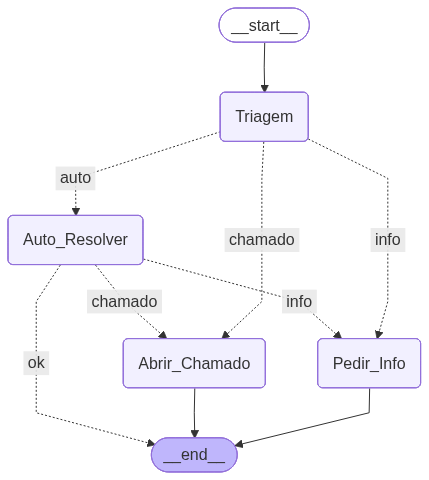

In [33]:
# Plotar o Grafo

# Importar biblioteca para exibição do grafo compilado
from IPython.display import display, Image

# Plotar o Grafo
graph_bytes = grafo_workflow.get_graph().draw_mermaid_png()
display(Image(graph_bytes))

In [34]:
# Testar o Agente de IA

# Parâmetros de teste do Agente de IA
testes = ["Posso reembolsar a internet?",
          "Quero mais 5 dias de trabalho remoto. Como faço?",
          "Posso reembolsar cursos ou treinamentos?",
          "É possível reembolsar certificações do Google Cloud?",
          "Posso obter o Google Gemini de graça?",
          "Posso ter alimentação reembolsada?",
          "Qual é o limite diário de reembolso de refeições?",
          "Quantas capivaras tem no Rio Pinheiros?"]

In [35]:
# Rodar o Agente de IA
for msg_test in testes:
  resposta_final = grafo_workflow.invoke({"pergunta": msg_test})

  triagem_agente = resposta_final.get("triagem", {})
  print(f"PERGUNTA: {msg_test}")
  print(f"DECISÃO: {triagem_agente.get('decisao')} | URGÊNCIA: {triagem_agente.get('urgencia')} | AÇÃO FINAL: {resposta_final.get('acao_final')}")
  print(f"RESPOSTA: {resposta_final.get('resposta')}")
  if resposta_final.get("citacoes"):
        print(" CITAÇÕES:")
        for citacao in resposta_final.get("citacoes"):
            print(f" - Documento: {citacao['documento']}, Página: {citacao['pagina']}")
            print(f"   Trecho: {citacao['trecho']}")

  print("------------------------------------")

Executando nó de Triagem...
Decidindo após Triagem...
Executando o Nó Auto Resolver...
Decidindo após o Auto Resolver...
RAG executado com sucesso, finalizando o processo.
PERGUNTA: Posso reembolsar a internet?
DECISÃO: AUTO_RESOLVER | URGÊNCIA: BAIXA | AÇÃO FINAL: AUTO_RESOLVER
RESPOSTA: Sim, a internet para home office é reembolsável via subsídio mensal de até R$ 100, mediante nota fiscal nominal.
 CITAÇÕES:
 - Documento: Política de Reembolsos (Viagens e Despesas).pdf, Página: 1
   Trecho: lsáveis.​ 3.​ Transporte: táxi/app são permitidos quando não houver alternativa viável. Comprovantes obrigatórios.​ 4.​ Internet para home office: reembolsável via subsídio mensal de até R$ 100, conforme política de Home Office.​
 - Documento: Políticas de Home Office.pdf, Página: 1
   Trecho: 5.​ Conectividade: há subsídio mensal de internet domiciliar para quem trabalha em home office, até R$ 100/mês, mediante nota fiscal nominal.​ Solicitação de exc
------------------------------------
Executan

**PALAVRA-CHAVE = LANGGRAPH**